<a href="https://colab.research.google.com/github/Paulo-vitorCS/DeepLearning/blob/main/Projeto_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 06: Classificação Multiclasse Iris

###Etapa 01: Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  # Para dividr a base de dados
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

###Etapa 02: Base de dados

In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [3]:
base = pd.read_csv('/content/iris.csv')

In [4]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


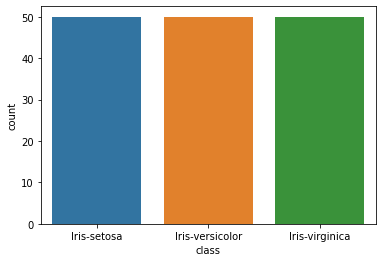

In [5]:
sns.countplot(base['class'])  # Visualização da distribuição

In [6]:
previsores = base.iloc[:,0:4].values  # 0:n -> 0, 1, 2, n-1
classe = base.iloc[:, 4].values

In [7]:
previsores.shape

(150, 4)

In [8]:
classe.shape

(150,)

In [9]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)  # Essa função se adequa aos dados, transformando a classe, ou seja, transforma as strings em números

In [11]:
np.unique(classe)  # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] -> [0, 1, 2]

array([0, 1, 2])

In [12]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size=0.25)

In [13]:
previsores_treinamento.shape  # 75% dos registros

(112, 4)

In [14]:
classe_treinamento.shape  # 75% dos registros

(112,)

In [15]:
previsores_teste.shape  # 25% dos registros

(38, 4)

In [16]:
classe_teste.shape  # 25% dos registros

(38,)

In [17]:
type(previsores_treinamento)

numpy.ndarray

In [18]:
# Converter do formato numpy.ndarray para o formato do pytorch
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype = torch.long)

In [19]:
type(previsores_treinamento)

torch.Tensor

In [20]:
type(classe_treinamento)

torch.Tensor

###Etapa 03: Construção do modelo

In [21]:
# 4 Neurônios na camada de entrada -> 4 neurônios na primeira camada oculta -> 4 neurônios na segunda camada oculta -> 3 neurônios na camada de saída
# Para definir a quantidade de neurônios : (entradas + saídas) / 2 = (4 + 3)/2 = 3,5 -> 4
classificador = nn.Sequential(
    nn.Linear(4, 4),  # Primeira camada densa, linear
    nn.ReLU(),  # Função de ativação
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

In [22]:
criterion = nn.CrossEntropyLoss()  # Calculo do erro. Classificação multiclasse (crossEntropyLoss)
optimizer = optim.Adam(classificador.parameters(), lr = 0.001,
                       weight_decay = 0.0001)

In [23]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle=True)

###Etapa 04: Treinamento do modelo

In [27]:
for epoch in range(2000):
    running_loss = 0. 
    running_accuracy = 0.

    for data in train_loader:
        inputs, labels = data  #inputs = atributos previsores, labels = respostas reais

        optimizer.zero_grad()  # Zerar o gradiente pra não ter valores anteriores no calculo atual

        outputs = classificador.forward(inputs)  # Previsões 
        loss = criterion(outputs, labels)  # Previsões com as respostas reais
        loss.backward()  # Backpropagation (atualização dos pesos)

        outputs = F.softmax(outputs)   # Aplica o softmax nos outputs, retornando uma probabilidade
        top_p, top_class = outputs.topk(k = 1, dim = 1)  #k = 1 -> classe com maior probabilidade | dim = 1 -> por coluna

        equals = top_class == labels.view(*top_class.shape)  # Se as previsões forem iguais a base, retorna true

        running_accuracy += torch.mean(equals.type(torch.float))

        optimizer.step()  # Atualização dos pesos

        running_loss += loss.item()
    
    print('Época %3d: perda %.5f - accuracy %.5f' % (epoch + 1, running_loss/len(train_loader),
          running_accuracy/len(train_loader)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Época   1: perda 1.08719 - accuracy 0.41667
Época   2: perda 1.09178 - accuracy 0.38333
Época   3: perda 1.09923 - accuracy 0.35000
Época   4: perda 1.09921 - accuracy 0.35000
Época   5: perda 1.10184 - accuracy 0.35000
Época   6: perda 1.09924 - accuracy 0.35000
Época   7: perda 1.09444 - accuracy 0.38333
Época   8: perda 1.09904 - accuracy 0.35000
Época   9: perda 1.09441 - accuracy 0.38333
Época  10: perda 1.10129 - accuracy 0.35000
Época  11: perda 1.09900 - accuracy 0.35000
Época  12: perda 1.10096 - accuracy 0.35000
Época  13: perda 1.09691 - accuracy 0.35000
Época  14: perda 1.09882 - accuracy 0.35000
Época  15: perda 1.09872 - accuracy 0.35000
Época  16: perda 1.09868 - accuracy 0.35000
Época  17: perda 1.10075 - accuracy 0.35000
Época  18: perda 1.09240 - accuracy 0.38333
Época  19: perda 1.09672 - accuracy 0.35000
Época  20: perda 1.09238 - accuracy 0.38333
Época  21: perda 1.09864 - accuracy 0.35000
Época  22: perda 1.08817 - accuracy 0.41667
Época  23: perda 1.09445 - accur

###Etapa 05: Treinamento do modelo


In [28]:
classificador.eval()  # Colocando o modelo em modo de avaliação

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [29]:
previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)

In [30]:
previsoes = classificador(previsores_teste)

In [31]:
previsoes

tensor([[-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
        [-0.0181,  0.1963,  0.0383],
 

In [32]:
F.softmax(previsoes)  # Gera as probabilidades

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.3033, 0.3758, 0.3209],
        [0.303

In [34]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]  # Índices com os maiores valores

In [35]:
previsoes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [36]:
matriz = confusion_matrix(previsoes, classe_teste)  # Gerando matriz de confusão
matriz

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

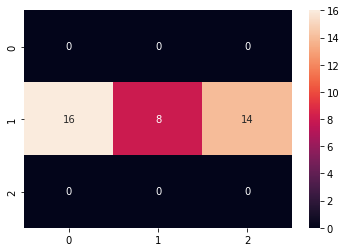

In [37]:
sns.heatmap(matriz, annot=True)  # Visualizar a matrix de confusão